In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---



1. **Frequency Tables**:

In [3]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("/Users/mustafaaldabbas/Documents/GitHub/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [140]:
category=df['category']
category.value_counts()


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [141]:
category_table=pd.DataFrame(category)
category_table

,category
0,Hi-Fi Speakers
1,Hi-Fi Speakers
2,Hi-Fi Speakers
3,Hi-Fi Speakers
4,Hi-Fi Speakers
...,...
2443646,Motorbike Clothing
2443647,Motorbike Clothing
2443648,Motorbike Clothing
2443649,Motorbike Clothing


In [84]:
#Generate a frequency table for the product category
category_table_frequency = df['category'].value_counts()

top5_frequency = category_table_frequency.head(5)

top5_frequency

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

### part 1- Visualization

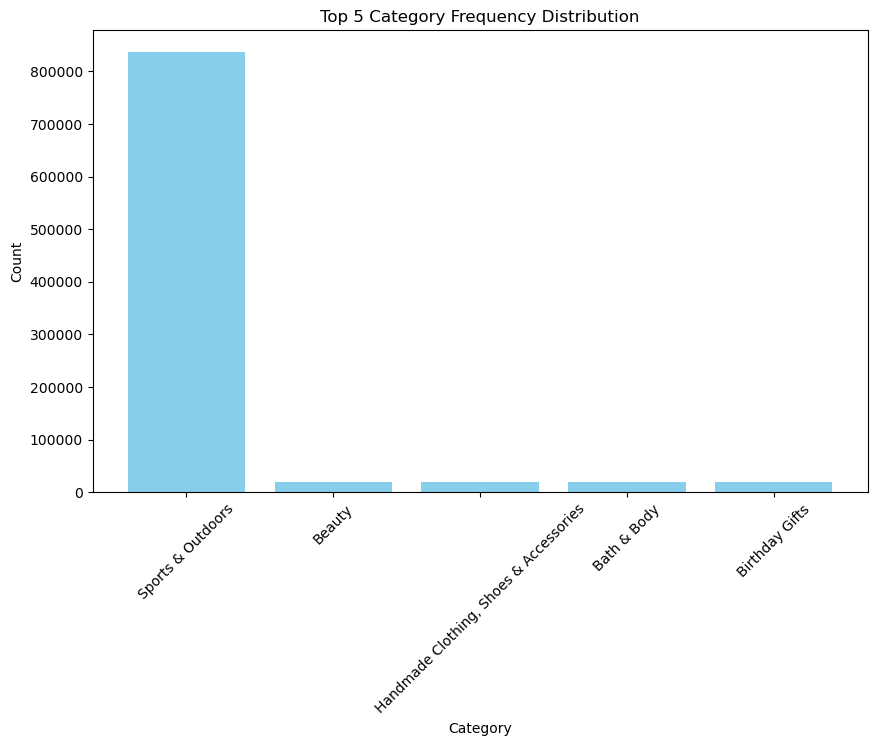

In [83]:
# Create bar chart for the top 5 categories by frequency
plt.figure(figsize=(10, 6))
plt.bar(top5_frequency.index, top5_frequency.values, color='skyblue')
plt.title('Top 5 Category Frequency Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [86]:
#calculate the top 5 categories proportions 
category_table_proportion = df['category'].value_counts(normalize=True)
top5_proportion= category_table_proportion.head(5)
top5_proportion

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64

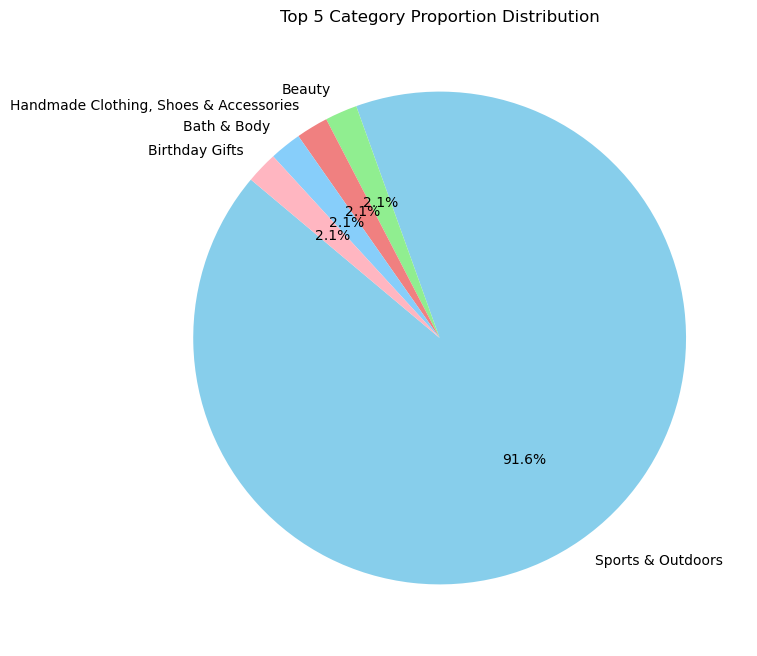

In [142]:

#create ba piechart for top 5 categories by proportion 
plt.figure(figsize=(8, 8))
plt.pie(top5_proportion, labels=top5_proportion.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Top 5 Category Proportion Distribution')
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---



In [124]:
df = pd.read_csv("/Users/mustafaaldabbas/Documents/GitHub/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [128]:

df['price'].value_counts(ascending=False)



price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

In [123]:
df.price.unique()

array([ 21.99,  23.99,  31.99, ..., 358.42, 341.67, 317.34])

In [129]:
### 1-  **Measures of Centrality**
# Calculate the mean price
mean_price = df['price'].mean()

# Calculate the median price
median_price = df['price'].median()

# Calculate the mode price
mode_price = df['price'].mode()[0]

# Display the results
mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

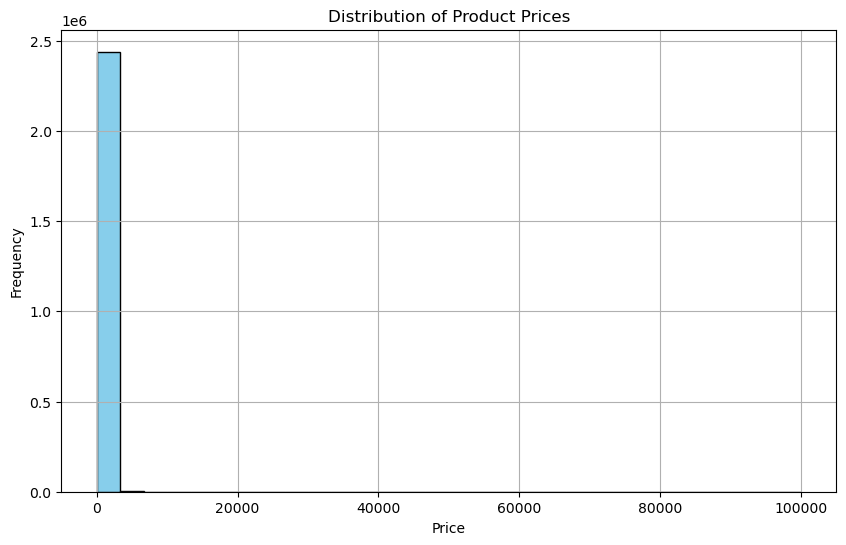

In [130]:
# Histogram to visualize the distribution of product prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

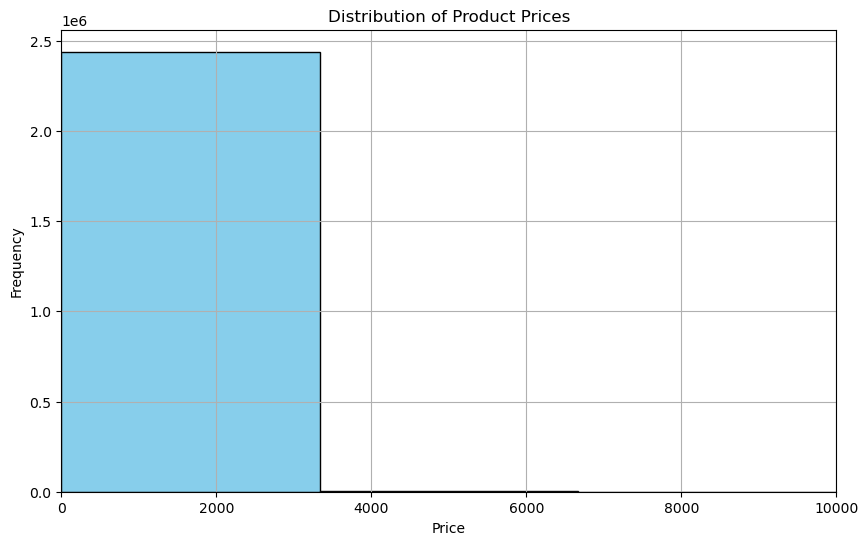

In [135]:
# Histogram to visualize the distribution of product prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 10000)  # Adjust this value based on your dataset to zoom in on the lower range
plt.grid(True)
plt.show()

In [91]:
#2- **Measures of Dispersion**:
# Calculate the variance for the product price
variance_price = df['price'].var()

# Calculate the standard deviation for the product price
std_deviation_price = df['price'].std()

# Calculate the range for the product price
range_price = df['price'].max() - df['price'].min()

# Calculate the interquartile range (IQR) for the product price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
iqr_price = Q3 - Q1

# Display the results
variance_price, std_deviation_price, range_price, iqr_price

(119445.48532256528, 345.60886175352226, 100000.0, 36.0)

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

In [151]:


# Calculate measures of centrality
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = mode(df['stars'])[0]

# Calculate measures of dispersion
variance_rating = df['stars'].var()
std_deviation_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

# Calculate shape of the distribution
skewness_rating = skew(df['stars'])
kurtosis_rating = kurtosis(df['stars'])


In [153]:

# Print the results
print(f"Mean stars: {mean_rating}")
print(f"Median stars: {median_rating}")
print(f"Mode stras: {mode_rating}")
print(f"Variance of stars: {variance_rating}")
print(f"Standard Deviation of stars: {std_deviation_rating}")
print(f"Interquartile Range (IQR) of stars: {iqr_rating}")
print(f"Skewness of stars: {skewness_rating}")

Mean stars: 2.152836472966065
Median stars: 0.0
Mode stras: 0.0
Variance of stars: 4.81743402976196
Standard Deviation of stars: 2.1948653785054697
Interquartile Range (IQR) of stars: 4.4
Skewness of stars: 0.08120730776283354


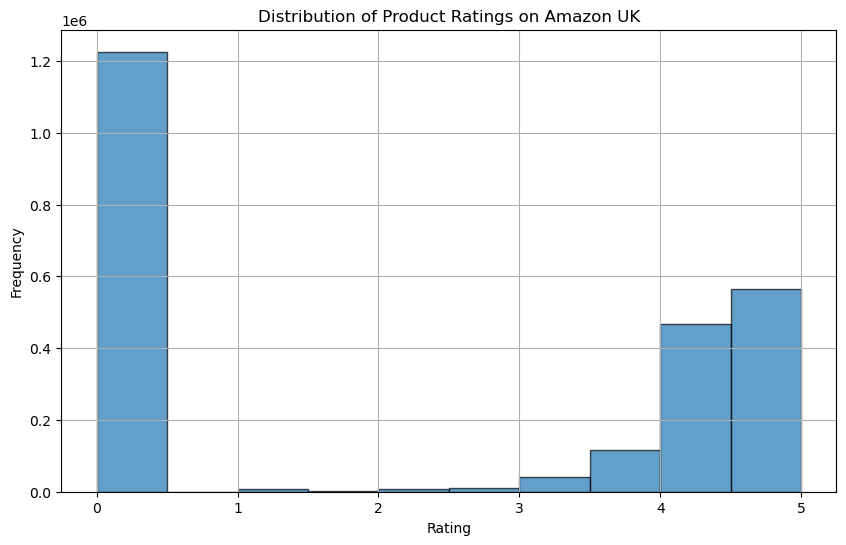

In [154]:
# Plot a histogram of product ratings
plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Ratings on Amazon UK')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()